In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
import tensorflow
tensorflow.__version__

'1.12.0'

In [30]:
# build the network
model = Sequential()
model.add(Dense(10, input_dim=125*100, activation='softmax'))
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr = 0.01, momentum=0.0)#, nesterov=False)
model.compile( optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'] )
model.set_weights([np.zeros((12500, 10)),np.zeros((10))])

In [31]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina' # linux only
#%matplotlib inline
import numpy as np

In [32]:
def charclass(png):     # extract character class name from file name
        return png.split('__')[1][:-4]

In [33]:
from os.path import join
def get_images_and_labels( folder ):
    pngs = sorted( glob(join(folder,'*.png')) )
    h,w,_ = np.array(Image.open(pngs[0])).shape
    h,w
    classes = sorted({charclass(png) for png in pngs}) # ['8','9','minus'] # 
    n = len(pngs)
    c = len(classes)
    # Load flattened images as columns of big array X
    X = np.empty((h*w,len(pngs)))
    for i,png in enumerate(pngs):
        X[:,i] = 255 - np.array(Image.open(png))[:,:,0].reshape(h*w)
    X /= 255
    # Get the true class numbers of all the images
    y = [classes.index(charclass(png)) for png in pngs]  # true classes of images
    Y = np.zeros((n,c),dtype=int)
    Y[ np.arange(n), y ] = 1  # one-hot encoding of true classes
    return X.T, Y  # tensorflow wants X the other way

In [34]:
# train the network
model.fit( *get_images_and_labels('pngs'), epochs=20, batch_size=16)

Epoch 1/20
1514/1514 [==============================] - 1s 555us/step - loss: 0.8446 - acc: 0.8203
Epoch 2/20
1514/1514 [==============================] - 1s 452us/step - loss: 0.3787 - acc: 0.9346
Epoch 3/20
1514/1514 [==============================] - 1s 450us/step - loss: 0.2934 - acc: 0.9531
Epoch 4/20
1514/1514 [==============================] - 1s 464us/step - loss: 0.2484 - acc: 0.9610
Epoch 5/20
1514/1514 [==============================] - 1s 464us/step - loss: 0.2210 - acc: 0.9643
Epoch 6/20
1514/1514 [==============================] - 1s 463us/step - loss: 0.2006 - acc: 0.9630
Epoch 7/20
1514/1514 [==============================] - 1s 464us/step - loss: 0.1869 - acc: 0.9670
Epoch 8/20
1514/1514 [==============================] - 1s 449us/step - loss: 0.1737 - acc: 0.9696
Epoch 9/20
1514/1514 [==============================] - 1s 454us/step - loss: 0.1635 - acc: 0.9703
Epoch 10/20
1514/1514 [==============================] - 1s 450us/step - loss: 0.1550 - acc: 0.9729
Epoch 11/

In [35]:
test_loss, test_acc = model.evaluate(*get_images_and_labels('testpngs'), verbose=2)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9273743040068856


In [36]:
# get the weights
W,_ = model.get_weights()
WT = W.T

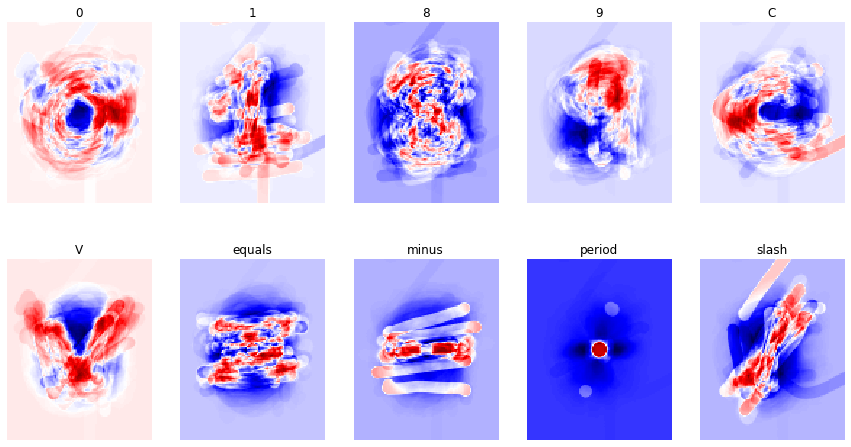

In [37]:
# make pictures of the current weights
c = WT.shape[0]
h,w = 125,100
selection = ['0', '1', '8', '9', 'C', 'V', 'equals', 'minus', 'period', 'slash']
plt.figure(figsize=(15,8))
for j in range(c):
    plt.subplot(2,c/2,j+1)
    plt.imshow( WT[j].reshape(h,w), cmap='seismic' )
    plt.axis('off')
    plt.title(selection[j])

On image of size (403, 227) , fftconvolve took 1.6872990131378174 seconds


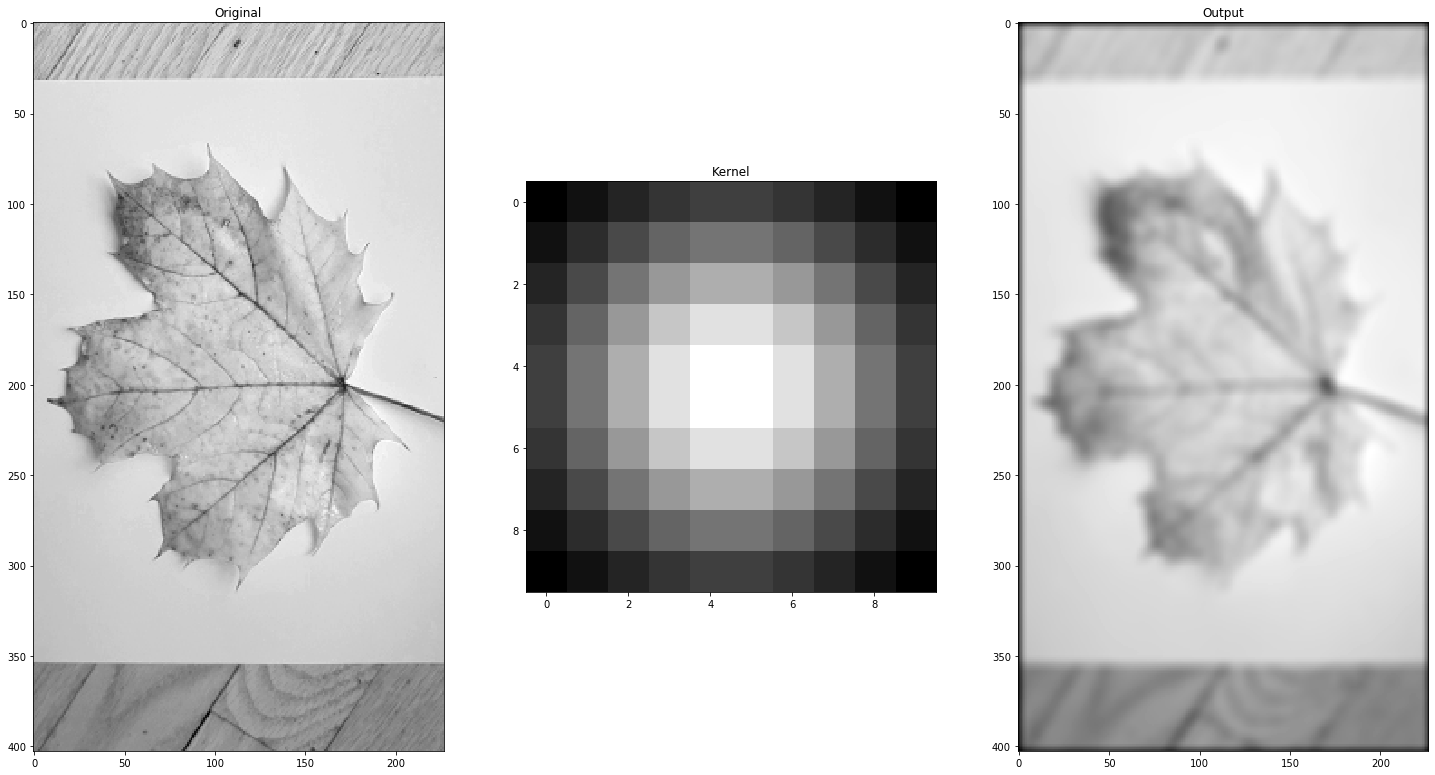

In [39]:
from scipy import signal
from scipy import misc
from time import time
from PIL import Image
face = np.array(Image.open('maple_leaf_small.jpg'))[:,:,0]
face = np.uint8((255.0*face)/face.max())
kernel = np.outer(signal.gaussian(10, 3), signal.gaussian(10, 3))
#kernel = np.array([[-1,-1],[1,1]])
tic = time()
blurred = signal.fftconvolve(face, kernel, mode='same')
toc = time()
print('On image of size',face.shape,', fftconvolve took', toc-tic, 'seconds')
fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(1,3,figsize=(25, 25),facecolor='w')
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
#ax_orig.set_axis_off()
ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Kernel')
#ax_kernel.set_axis_off()
ax_blurred.imshow(blurred, cmap='gray')
ax_blurred.set_title('Output');